In [ ]:
import json
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sy_files = [
    'result/inst1/2048-ddqn-sparse-32-0.95-0.001-lp-de-True.log',
    'result/inst2/2048-ddqn-sparse-32-0.95-0.001-lp-fve-True.log',
    'result/inst3/2048-ddqn-sparse-32-0.95-0.001-mmt-de-True.log',
    'result/inst4/2048-ddqn-sparse-32-0.95-0.001-mmt-fve-True.log',
    'result/inst5/2048-ddqn-sparse-32-0.95-0.001-sswolp-de-True.log',
    'result/inst6/2048-ddqn-sparse-32-0.95-0.001-sswolp-fve-True.log',
    'result/inst7/2048-ddqn-sparse-32-0.95-0.001-sswlp-de-True.log',
    'result/inst8/2048-ddqn-sparse-32-0.95-0.001-sswlp-fve-True.log',
]

# Ken, add your lines here and replace the sy variables with your variables
# files = sy_files
files = ['result/2048-ddqn-sparse-32-0.95-0.0001-lp-de-True.log']
open_files = []

for file in files:
    with open(file, 'r') as f:
        open_files.append(f.readlines())


In [ ]:
def process(line):
    line = line.split('INFO ')[1].strip().replace('\'', '"')
    return json.loads(line)

In [ ]:
def graph_losses(i, losses):
    plt.figure(i)
    losses.rolling(window=10000).mean().plot()

for i, lines in enumerate(open_files):
    losses = pd.Series([process(line)['loss'] for line in lines if 'loss' in line])
    graph_losses(i, losses)


In [ ]:
def graph_maxtiles(i, maxtiles):
    plt.figure(i)
    maxtiles.rolling(window=10000).mean().plot()

for i, lines in enumerate(open_files):
    maxtiles = pd.Series([process(line)['maxtile'] for line in lines if 'loss' in line])
    graph_maxtiles(i, maxtiles)


In [ ]:
def graph_perf(i, maxtiles, filename):
    for j, graph_title in enumerate(['mean q value', 'avg no of moves']):
        plt.figure(i * 2 + j)
        pd.Series([score[graph_title] for score in perf]).rolling(window=50).mean().plot(title=graph_title + ':' + filename)

for i, lines in enumerate(open_files):
    perf = [process(line) for line in lines if 'Perf' in line]
    graph_perf(i, maxtiles, files[i])

# Perf log line: {'Performance at episode': 0, 'max tile distribution': '[(32, 2), (64, 6), (128, 2)]', 'avg no of moves': 98.7, 'mean q value': 0.04516346722284192}

In [ ]:
def graph_states(i, maxtiles, filename):
    for state_name in ['state_1', 'state_2', 'state_3', 'state_4', 'state_5', 'state_6', 'state_last', 'state_after',
                   'state_up', 'state_down', 'state_left', 'state_right']:
        pd.DataFrame([state[state_name] for state in states]).rolling(window=10).mean().plot(title=state_name + ':' + filename)

for i, lines in enumerate(open_files):
    states = [process(line) for line in lines if 'state' in line]
    graph_states(i, maxtiles, files[i])

# States log line: {'state_2': [-0.032261938, -0.037135031, 0.0051749204, -0.006888926], 'state_last': [-0.041607704, -0.12463005, 0.041780889, 0.040813953], 'state_4': [-0.10011595, -0.013862026, 0.12524532, 0.045677286], 'state_1': [-0.039111272, -0.015608756, 0.092330091, -0.028924691], 'state_left': [-0.039900277, -0.025326842, 0.016707165, 0.00066232559], 'state_3': [-0.10011595, -0.013862026, 0.12524532, 0.045677286], 'state_up': [-0.040148105, -0.044969659, 0.065167211, 0.077003129], 'state_5': [-0.094294421, -0.037973065, 0.12841231, 0.0079234624], 'state_6': [-0.16285172, -0.0038290848, 0.10532054, 0.0074468851], 'state_down': [-0.070415191, -0.0021197568, 0.063679926, -0.044730946], 'state_right': [-0.056279227, -0.056716144, 0.057538126, 0.013577979], 'state_after': [-0.057333861, -0.046993401, 0.26026446, -0.037176244], 'state_first': [-0.011065061, -0.0051072775, 0.0086382851, -0.0062735034]}

In [9]:
##################
## Single plots ##
##################
import json
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

file = 'result/2048-ddqn-sparse-32-0.95-0.0001-lp-de-True.log'

with open(file, 'r') as f:
    lines=f.readlines()
    
def process(line):
    line = line.split('INFO ')[1].strip().replace('\'', '"')
    return json.loads(line)

losses = pd.Series([process(line)['loss'] for line in lines if 'loss' in line])
maxtiles = pd.Series([process(line)['maxtile'] for line in lines if 'loss' in line])
perf = [process(line) for line in lines if 'Perf' in line]
states = [process(line) for line in lines if 'state' in line]

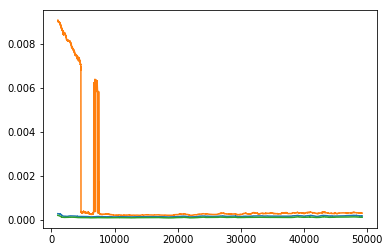

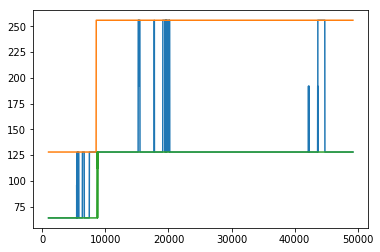

In [2]:
plt.figure(0)
losses = losses[-400000:]
losses.rolling(window=1000).median().plot()
losses.rolling(window=1000).quantile(0.75).plot()
losses.rolling(window=1000).quantile(0.25).plot()
plt.figure(1)
maxtiles = maxtiles[-400000:]
maxtiles.rolling(window=1000).median().plot()
maxtiles.rolling(window=1000).quantile(0.75).plot()
maxtiles.rolling(window=1000).quantile(0.25).plot()

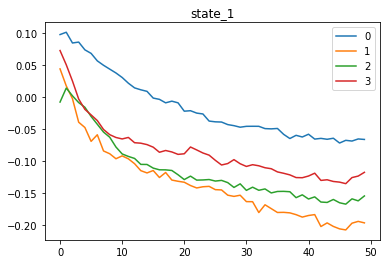

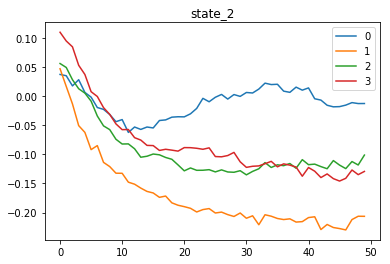

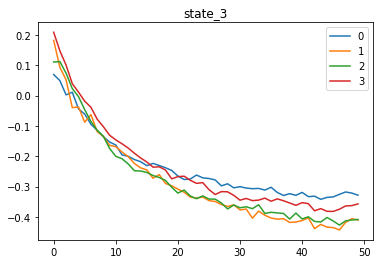

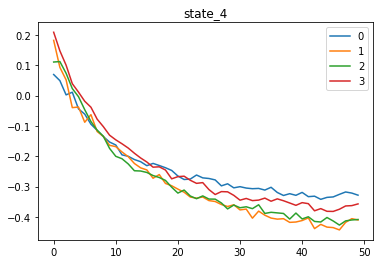

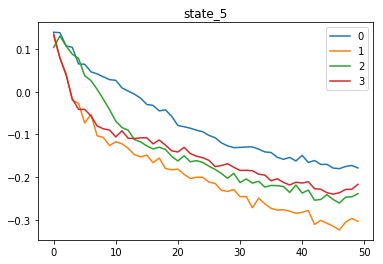

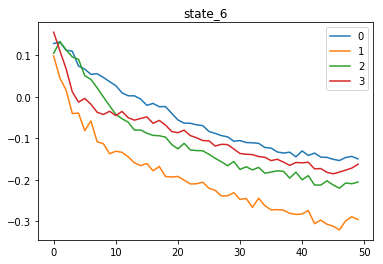

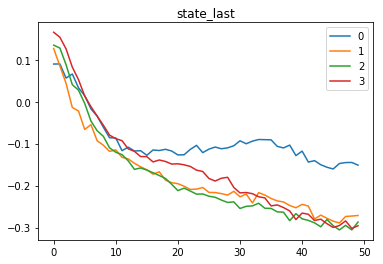

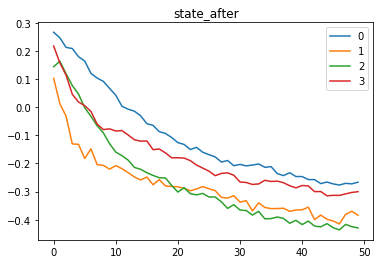

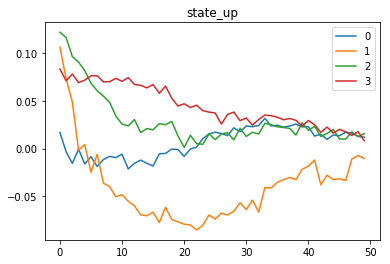

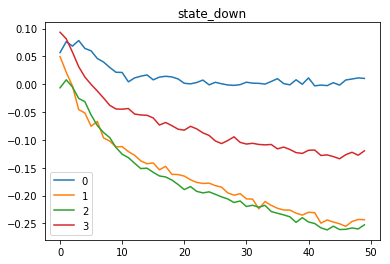

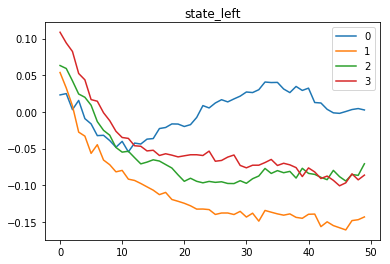

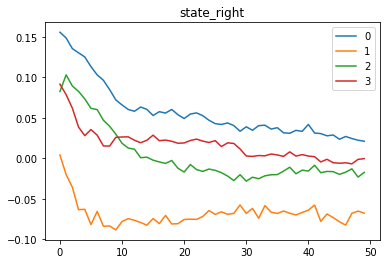

In [5]:
for state_name in ['state_1', 'state_2', 'state_3', 'state_4', 'state_5', 'state_6', 'state_last', 'state_after',
                   'state_up', 'state_down', 'state_left', 'state_right']:
    pd.DataFrame([state[state_name] for state in states]).rolling(window=1).mean().plot(title=state_name)

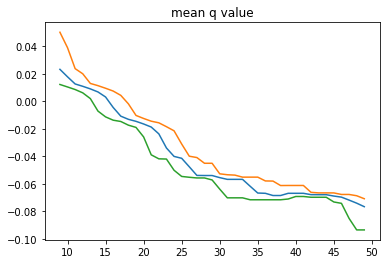

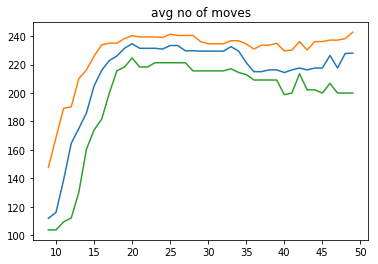

In [8]:
for i, graph_title in enumerate(['mean q value', 'avg no of moves']):
    plt.figure(i)
    pd.Series([score[graph_title] for score in perf]).rolling(window=10).median().plot(title=graph_title)
    pd.Series([score[graph_title] for score in perf]).rolling(window=10).quantile(0.75).plot(title=graph_title)
    pd.Series([score[graph_title] for score in perf]).rolling(window=10).quantile(0.25).plot(title=graph_title)

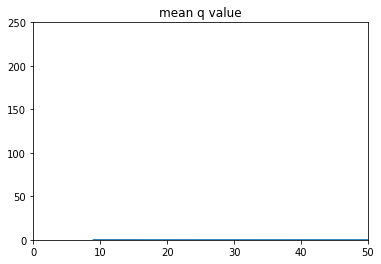

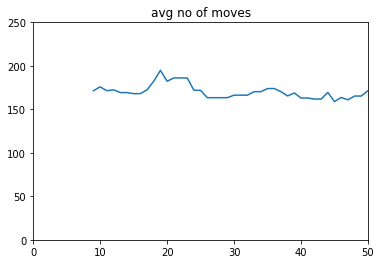

In [13]:
for i, graph_title in enumerate(['mean q value', 'avg no of moves']):
    plt.figure(i)
    pd.Series([score[graph_title] for score in perf]).rolling(window=10).median().plot(title=graph_title, xlim=(0, 50), ylim=(0, 250))
#     pd.Series([score[graph_title] for score in perf]).rolling(window=10).quantile(0.75).plot(title=graph_title)
#     pd.Series([score[graph_title] for score in perf]).rolling(window=10).quantile(0.25).plot(title=graph_title)